In [55]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [56]:
path_train = './Data/train.xlsx'
path_test = './Data/test.xlsx'

In [57]:
train_data = pd.read_excel(path_train)
test_data = pd.read_excel(path_test)


In [58]:
# Data Cleaning Process
# Combine the two datasets, and check for missing values and data types

# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Checking for missing values and data types
combined_data.info(), combined_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TR          200 non-null    int64  
 1   start Tm    200 non-null    int64  
 2   end tm      200 non-null    int64  
 3   Unnamed: 3  200 non-null    object 
 4   area        200 non-null    int64  
 5   area %      200 non-null    float64
 6   height      200 non-null    int64  
 7   height %    200 non-null    float64
 8   A/H         200 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 14.2+ KB


(None,
 TR            0
 start Tm      0
 end tm        0
 Unnamed: 3    0
 area          0
 area %        0
 height        0
 height %      0
 A/H           0
 dtype: int64)

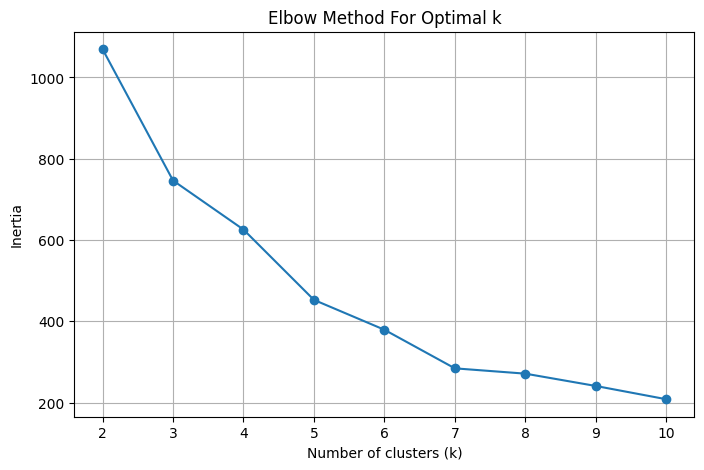

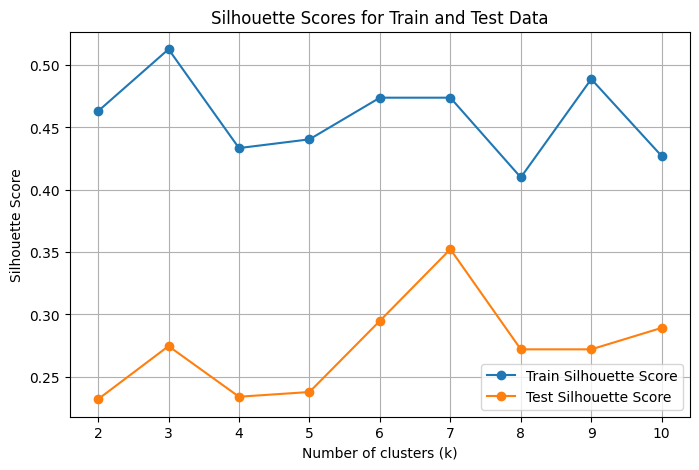

In [75]:


# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Dropping any non-numeric columns if they exist
numeric_data = combined_data.select_dtypes(include=['number'])

# Standardizing the data before applying K-Means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Applying K-Means Clustering with different values of k to calculate inertia and silhouette scores
inertia = []
silhouette_scores_train = []
silhouette_scores_test = []

for k in range(2, 11):  # Starting from 2 as silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit on combined data
    kmeans.fit(scaled_data)
    
    # Predict for both train and test data
    train_clusters = kmeans.predict(scaled_data[:len(train_data)])
    test_clusters = kmeans.predict(scaled_data[len(train_data):])
    
    # Calculate inertia for combined data
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette scores for train and test data
    silhouette_scores_train.append(silhouette_score(scaled_data[:len(train_data)], train_clusters))
    silhouette_scores_test.append(silhouette_score(scaled_data[len(train_data):], test_clusters))

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plotting silhouette scores for train and test data
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores_train, marker='o', label='Train Silhouette Score')
plt.plot(range(2, 11), silhouette_scores_test, marker='o', label='Test Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
# Selecting the best k 
best_k = 3  
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit and predict clusters on the entire combined data
combined_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Selecting only the numeric columns for summarizing the mean values of each cluster
numeric_columns = combined_data.select_dtypes(include=['number']).columns

# Analyzing the clustering results by summarizing the mean values of each cluster
cluster_summary = combined_data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

# Calculating final silhouette scores for combined, train, and test data
silhouette_score_combined = silhouette_score(scaled_data, combined_data['Cluster'])
silhouette_score_train = silhouette_score(scaled_data[:len(train_data)], kmeans.predict(scaled_data[:len(train_data)]))
silhouette_score_test = silhouette_score(scaled_data[len(train_data):], kmeans.predict(scaled_data[len(train_data):]))

print(f'Silhouette Score on Combined Data: {silhouette_score_combined}')
print(f'Silhouette Score on Training Data: {silhouette_score_train}')
print(f'Silhouette Score on Test Data: {silhouette_score_test}')


                   TR      start Tm        end tm          area    area %  \
Cluster                                                                     
0        11809.712121  11769.166667  11843.484848  3.560898e+05  0.261818   
1         4976.027027   4935.135135   5014.054054  4.223143e+06  3.287297   
2         5502.216495   5468.711340   5530.670103  7.140342e+05  0.629794   

               height  height %       A/H  Cluster  
Cluster                                             
0        1.583629e+05  0.205303  2.054848      0.0  
1        2.252528e+06  3.389730  1.745135      1.0  
2        3.916365e+05  0.629175  1.599588      2.0  
Silhouette Score on Combined Data: 0.33766583475860457
Silhouette Score on Training Data: 0.5127815365942637
Silhouette Score on Test Data: 0.27458318149208266
